# A few quick things

* [Can you execute only the selected text in a notebook cell?](https://github.com/jupyter/notebook/issues/252)
    * Yes, but you have to do [a bit of work](https://carreau.gitbooks.io/jupyter-book/content/custom-extension-1.html)
* Useful tip: you can get help with ?
    * e.g., `?np.random.normal`
* Useful tip 2: you can execute shell commands with !
    * e.g., `!conda install seaborn`

# Overview of Day 3
* Preliminaries
* Describing and summarizing data
* Visualization with matplotlib and seaborn
* Statistical analysis in SciPy and statsmodels
* Bayesian modeling in PyMC3

# Preliminaries
* Import stuff
* Load the preprocessed data

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline

# Disable annoying SettingWithCopyWarning
pd.options.mode.chained_assignment = None

In [124]:
# If you don't have the data locally, use the commented line instead
# data = pd.read_csv('data/preprocessed_data.csv')

# data = pd.read_csv('https:// github.com/tyarkoni/SSI2016/blob/master/data/preprocessed_data.csv')  
data.head()

,id,name,datetime,monthyear,outcome,outcome_subtype,animal,sex_string,age_string,breed,...,sex,sterilized,first_color,mixed_color,merge_key,breed_name,min_weight,max_weight,height,group
0,A006100,Scamp,2014-12-20 16:35:00,12/20/2014 04:35:00 PM,Return to Owner,NaN,Dog,Neutered Male,7 years,Spinone Italiano Mix,...,0.0,1.0,Yellow,1,Spinone Italiano,Spinone Italiano,52.0,96.0,22.0,Sporting
1,A047759,Oreo,2014-04-07 15:12:00,04/07/2014 03:12:00 PM,Transfer,Partner,Dog,Neutered Male,10 years,Dachshund,...,0.0,1.0,Tricolor,0,Dachshund,Dachshund,17.0,32.0,14.0,Terrier
2,A134067,Bandit,2013-11-16 11:54:00,11/16/2013 11:54:00 AM,Return to Owner,NaN,Dog,Neutered Male,16 years,Shetland Sheepdog,...,0.0,1.0,Brown,1,Shetland Sheepdog,Shetland Sheepdog,12.0,24.0,13.0,Herding
3,A141142,Bettie,2013-11-17 11:40:00,11/17/2013 11:40:00 AM,Return to Owner,NaN,Dog,Spayed Female,15 years,Labrador Retriever/Pit Bull,...,1.0,1.0,Black,1,Labrador Retriever,Labrador Retriever,49.0,77.0,21.0,Sporting
4,A163459,Sasha,2014-11-14 19:28:00,11/14/2014 07:28:00 PM,Return to Owner,NaN,Dog,Intact Female,15 years,Miniature Schnauzer Mix,...,1.0,0.0,Black,1,Miniature Schnauzer,Miniature Schnauzer,9.0,19.0,13.0,Terrier


# Describing and summarizing data
* It's a good idea to explore your data before you start modeling
* Surprising how often interesting results reflect overlooked problems

### A bird's eye view
* Simple pandas tools for describing/inspecting entire datasets
    * .describe(), .head() and .tail(), .dtypes(), etc...

In [125]:
# Describe the continuous variables in the dataset
# for both categorical and continuous variables, with quartiles
data.describe(percentiles=[0.95, 0.2, 0.3])

/Users/tal/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,day,hour,month,year,age,sex,sterilized,mixed_color,min_weight,max_weight,height
count,40612.000000,40612.00000,40612.000000,40612.000000,40578.000000,36992.000000,36992.000000,40612.000000,20416.000000,20416.000000,20416.000000
mean,3.086477,14.35684,6.889909,2014.425909,25.262913,0.480915,0.721372,0.516424,30.392388,55.258229,15.576607
std,2.051456,3.39752,3.490948,0.742018,34.641555,0.499642,0.448330,0.499736,20.782771,34.799514,5.918361
min,0.000000,0.00000,1.000000,2013.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,6.000000
20%,1.000000,12.00000,3.000000,2014.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
30%,2.000000,13.00000,5.000000,2014.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
50%,3.000000,15.00000,7.000000,2014.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
95%,6.000000,18.00000,12.000000,2016.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
max,6.000000,23.00000,12.000000,2016.000000,264.000000,1.000000,1.000000,1.000000,128.000000,200.000000,29.000000


## Frequency counts
* 1-dimensional frequency counts can provide quick insight, diagnose problems
* What are the [top dog and cat names](http://dogtime.com/dog-names/female-dog-names/21032-top-10-most-popular-dog-and-cat-names-of-2014) in Austin?

In [126]:
top_n = 20
for species in ['Dog', 'Cat']:
    name_counts = data.query('animal == @species')['name'].value_counts()
    print("\nTop {} {} names:\n{}".format(top_n, species, name_counts[:top_n]))


Top 20 Dog names:
Bella       152
Max         132
Princess    102
Rocky       102
Daisy        99
Charlie      98
Buddy        91
Lucy         82
Coco         75
Lola         73
Luna         72
Lucky        69
Chico        63
Duke         56
Jack         56
Sadie        55
Shadow       53
Zeus         52
Lady         52
Blue         51
Name: name, dtype: int64

Top 20 Cat names:
X           34
Bella       30
Kitty       24
Oliver      22
Luna        20
Oreo        20
Charlie     19
Princess    19
Lucy        17
Max         16
Tiger       16
Smokey      16
Daisy       15
*Willow     15
Milo        15
*Charlie    15
*Jack       15
Blue        14
*Max        14
Oscar       14
Name: name, dtype: int64


### What the heck kind of name is "X"?

In [127]:
data.query('name == "X"').tail(10)

,id,name,datetime,monthyear,outcome,outcome_subtype,animal,sex_string,age_string,breed,...,sex,sterilized,first_color,mixed_color,merge_key,breed_name,min_weight,max_weight,height,group
15633,A683246,X,2014-07-23 10:10:00,07/23/2014 10:10:00 AM,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,...,0.0,0.0,Black,1,Domestic,NaN,NaN,NaN,NaN,NaN
15634,A683247,X,2014-07-23 10:11:00,07/23/2014 10:11:00 AM,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,...,0.0,0.0,Black,1,Domestic,NaN,NaN,NaN,NaN,NaN
15636,A683249,X,2014-07-21 10:43:00,07/21/2014 10:43:00 AM,Transfer,Partner,Cat,Spayed Female,1 year,Domestic Shorthair Mix,...,1.0,1.0,Cream Tabby,1,Domestic,NaN,NaN,NaN,NaN,NaN
15637,A683250,X,2014-07-24 12:49:00,07/24/2014 12:49:00 PM,Transfer,Partner,Cat,Neutered Male,1 year,Domestic Shorthair Mix,...,0.0,1.0,Orange Tabby,0,Domestic,NaN,NaN,NaN,NaN,NaN
15638,A683251,X,2014-07-22 11:55:00,07/22/2014 11:55:00 AM,Transfer,Partner,Cat,Neutered Male,1 year,Domestic Shorthair Mix,...,0.0,1.0,Cream Tabby,0,Domestic,NaN,NaN,NaN,NaN,NaN
15644,A683259,X,2014-07-23 13:45:00,07/23/2014 01:45:00 PM,Euthanasia,Medical,Dog,Intact Female,10 years,Labrador Retriever Mix,...,1.0,0.0,Black,1,Labrador Retriever,Labrador Retriever,49.0,77.0,21.0,Sporting
15645,A683260,X,2014-07-18 13:01:00,07/18/2014 01:01:00 PM,Transfer,Partner,Dog,Spayed Female,6 years,Australian Cattle Dog Mix,...,1.0,1.0,Blue Merle,0,Australian Cattle Dog,Australian Cattle Dog,31.0,53.0,17.0,Herding
15647,A683262,X,2014-07-18 13:02:00,07/18/2014 01:02:00 PM,Transfer,Partner,Dog,Neutered Male,1 year,Labrador Retriever Mix,...,0.0,1.0,Buff,0,Labrador Retriever,Labrador Retriever,49.0,77.0,21.0,Sporting
15648,A683263,X,2014-07-18 13:02:00,07/18/2014 01:02:00 PM,Transfer,Partner,Dog,Intact Female,6 years,Australian Shepherd Mix,...,1.0,0.0,Black,1,Australian Shepherd Dog,Australian Shepherd Dog,38.0,66.0,18.0,Herding
15671,A683301,X,2014-07-18 13:03:00,07/18/2014 01:03:00 PM,Transfer,Partner,Dog,Neutered Male,7 years,Australian Cattle Dog Mix,...,0.0,1.0,Black,1,Australian Cattle Dog,Australian Cattle Dog,31.0,53.0,17.0,Herding


### Contingency tables
* It's useful to examine contingency tables (or crosstabs) for pairs of variables
* Normalized crosstabs can be particularly informative

In [128]:
# Select only dogs
dogs = data.query('animal=="Dog"')

# Keep only common breeds--estimates won't be reliable for uncommon ones
dogs = dogs.groupby('breed').filter(lambda x: len(x) >= 100)

# How many breeds left?
print("Unique breeds:", dogs['breed'].nunique())

# Generate contingency table
ctab = pd.crosstab(dogs['breed'], data['outcome'])


# Sort in descending order of number of animals of each breed
ctab = ctab.loc[ctab.sum(1).sort_values(ascending=False).index]

# Show just the top 10
ctab[:10]

Unique breeds: 34


outcome,Adoption,Died,Disposal,Euthanasia,Missing,Return to Owner,Transfer
breed,,,,,,,
Pit Bull Mix,817,5,0,380,2,880,694
Chihuahua Shorthair Mix,1091,17,0,122,1,568,700
Labrador Retriever Mix,850,9,0,95,2,519,476
German Shepherd Mix,363,4,0,37,0,233,193
Australian Cattle Dog Mix,251,2,0,20,0,118,122
Dachshund Mix,208,0,0,11,0,88,130
Miniature Poodle Mix,156,1,0,11,0,101,67
Boxer Mix,138,1,0,16,1,93,82
Border Collie Mix,153,1,0,16,0,74,80


#### Normalized crosstabs
We can normalize the crosstab by dividing by the sum of the rows and/or columns

In [129]:
# Normalize by row to show proportion of animals accounted for by each outcome
nctab = ctab.divide(ctab.sum(1), 0).round(2)
nctab[:10]

outcome,Adoption,Died,Disposal,Euthanasia,Missing,Return to Owner,Transfer
breed,,,,,,,
Pit Bull Mix,0.29,0.00,0.0,0.14,0.0,0.32,0.25
Chihuahua Shorthair Mix,0.44,0.01,0.0,0.05,0.0,0.23,0.28
Labrador Retriever Mix,0.44,0.00,0.0,0.05,0.0,0.27,0.24
German Shepherd Mix,0.44,0.00,0.0,0.04,0.0,0.28,0.23
Australian Cattle Dog Mix,0.49,0.00,0.0,0.04,0.0,0.23,0.24
Dachshund Mix,0.48,0.00,0.0,0.03,0.0,0.20,0.30
Miniature Poodle Mix,0.46,0.00,0.0,0.03,0.0,0.30,0.20
Boxer Mix,0.42,0.00,0.0,0.05,0.0,0.28,0.25
Border Collie Mix,0.47,0.00,0.0,0.05,0.0,0.23,0.25


#### Drilling down further
* Euthanasia is a pretty general category
* Why are pit bulls being euthanized at such a high rate?
* Repeat with outcome subtype

In [130]:
# We can do the same thing for outcome subtype
sctab = pd.crosstab(dogs['breed'], data['outcome_subtype'])
sctab = sctab.divide(sctab.sum(1), 0).round(2)

# We could add a column for number of dogs in each breed
sctab['number'] = dogs.groupby('breed')['animal'].count()

# sort in descending order of 'aggressive'
sctab.sort_values('Aggressive', ascending=True)[:10]

outcome_subtype,Aggressive,At Vet,Behavior,Court/Investigation,Enroute,Foster,In Foster,In Kennel,In Surgery,Medical,Offsite,Partner,Possible Theft,Rabies Risk,Suffering,number
breed,,,,,,,,,,,,,,,,
Yorkshire Terrier Mix,0.0,0.0,0.00,0.00,0.0,0.09,0.00,0.00,0.0,0.01,0.04,0.69,0.0,0.00,0.16,213
Jack Russell Terrier Mix,0.0,0.0,0.00,0.00,0.0,0.23,0.00,0.00,0.0,0.00,0.01,0.68,0.0,0.03,0.06,203
Miniature Schnauzer Mix,0.0,0.0,0.00,0.00,0.0,0.09,0.00,0.00,0.0,0.02,0.02,0.74,0.0,0.00,0.13,203
Dachshund/Chihuahua Shorthair,0.0,0.0,0.00,0.00,0.0,0.15,0.00,0.00,0.0,0.00,0.00,0.72,0.0,0.02,0.10,104
Chihuahua Shorthair Mix,0.0,0.0,0.00,0.00,0.0,0.11,0.01,0.01,0.0,0.01,0.04,0.71,0.0,0.01,0.11,2500
Chihuahua Shorthair,0.0,0.0,0.00,0.00,0.0,0.28,0.00,0.00,0.0,0.00,0.02,0.62,0.0,0.00,0.08,125
Cairn Terrier Mix,0.0,0.0,0.00,0.00,0.0,0.12,0.00,0.00,0.0,0.00,0.02,0.77,0.0,0.04,0.04,150
Chihuahua Longhair Mix,0.0,0.0,0.00,0.00,0.0,0.10,0.00,0.02,0.0,0.00,0.02,0.76,0.0,0.02,0.09,186
Beagle Mix,0.0,0.0,0.00,0.00,0.0,0.11,0.00,0.02,0.0,0.00,0.00,0.82,0.0,0.00,0.05,172


### What does this mean?
1 in 3 pit bulls that pass through AAC are euthanized! Some possible interpretations:
* Pit bulls are much more dangerous than other dog breeds
    * Could be genetic
    * Could be abusive owners
* There could be a bias against pit bulls, causing many to be unnecessarily euthanized
* Mixed-breed dogs with behavioral problems may be more likely to be labeled pit bulls
* Others?

# Visualization in Python
* That thing about a picture being worth...
* Python has a rich visualization ecosystem
* The primary platform for visualization in Python is [matplotlib](http://matplotlib.org/)
* Most other visualization platforms build on matplotlib
    * But see, e.g., [Bokeh](http://bokeh.pydata.org/en/latest/)


## Matplotlib
* Highly object-oriented (contrast with, e.g., R)
    * Easy to modify/customize plots created in different packages
* Documentation is comprehensive, but not very well organized
* Provides a basic set of high-level plots (barplot, scatter, etc.)
* Beyond that, API has a fairly steep learning curve

### Simple examples

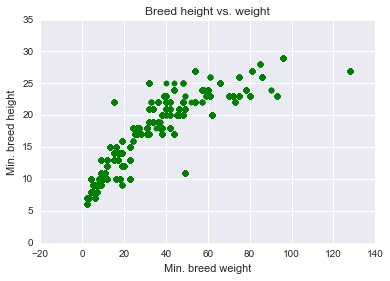

In [131]:
plt.scatter(data['min_weight'], data['height'], color='green', s=30)
plt.xlabel("Min. breed weight")
plt.ylabel("Min. breed height")
plt.title("Breed height vs. weight")

([<matplotlib.axis.XTick at 0x154442710>,
 <a list of 7 Text xticklabel objects>)

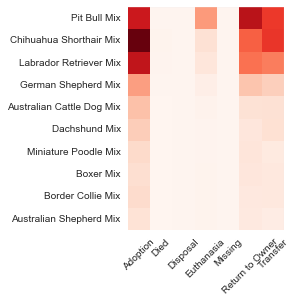

In [132]:
# A heatmap of the crosstab we made earlier
plt.imshow(ctab[:10], interpolation='none', cmap='Reds')
plt.gca().grid('off')
plt.yticks(np.arange(10), ctab[:10].index)
plt.xticks(np.arange(7), ctab.columns, rotation=45)

## Customization in matplotlib
* matplotlib is infinitely customizable
* As in most modern plotting environments, you can do virtually anything
* You just have to be willing to spend enough time on it

### Matplotlib styles
<img src="https://raw.githubusercontent.com/rasbt/matplotlib-gallery/master/images/formatting_4.png">
https://twitter.com/rasbt/status/731205324187795457

In [133]:
# A whole bunch of custom plotting code, just to generate
# a relatively simple result.
def plot_outcomes_by_time(data, unit='hour', min_unit=None, max_unit=None,
                          animal=None, panel=None, agg_func='count'):
    ''' Custom plotting functions that displays the number of
    outcomes of each type as a function of a unit of time and
    (optionally) any categorical variable.
    '''
    if animal is not None:
        data = data[data['animal'].isin(animal)]
    if panel is not None:
        if panel == 'year':
            panel_vars = [2014, 2015]
        else:
            panel_vars = data[panel].unique()
        n_panels = len(panel_vars)
        fig, axes = plt.subplots(1, n_panels, figsize=(4*n_panels, 4),
                                 sharex=True, sharey=True)
    else:
        axes = [plt.gca()]

    outcomes = ['Adoption', 'Transfer', 'Return to Owner', 'Euthanasia']
    dummies = pd.get_dummies(data['outcome'])
    data = pd.concat([data, dummies], axis=1)
    
    if min_unit is not None:
        data = data[data[unit] >= min_unit]
    if max_unit is not None:
        data = data[data[unit] <= max_unit]
    
    for oc in outcomes:
        groupers = [unit]
        if panel is not None:
            groupers.append(panel)
        line = data.query('outcome==@oc')\
            .groupby(groupers)[oc].agg(agg_func).reset_index()
        if panel is not None:
            for i, pan in enumerate(panel_vars):
                pan_line = line[line[panel]==pan]
                axes[i].plot(pan_line[unit], pan_line[oc], label=oc, lw=3)
                axes[i].set_title('{}: {}'.format(panel, pan), fontsize=18)
                axes[i].set_xlabel(unit, fontsize=18)
                axes[i].set_ylabel("No. of outcomes", fontsize=18)
    plt.legend(fontsize=16, loc='best')

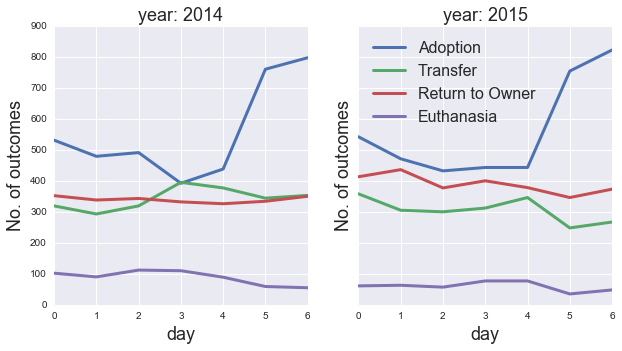

In [134]:
# Now we can flexibly call our custom plotter

# # Plot outcome counts by hour, paneling by animal
# plot_outcomes_by_time(data, animal=['Cat'], unit='hour', panel='year')
# plt.gcf().set_size_inches((15, 5))

# Plot outcome counts by day of week, only for dogs, paneling by year
plot_outcomes_by_time(data, animal=['Dog'], unit='day', panel='year')
plt.gcf().set_size_inches((10, 5))

### Alternative interfaces to matplotlib
* Most of the time you don't want to spend three hours making a nice barplot
* The appeal of packages like ggplot2 is power and elegance with speed
* A number of high-level Python plotting packages built on matplotlib exist
* You can always customize any plot after the fact

### ggplot for Python
* ggplot2 has been (mostly) [ported to Python](http://ggplot.yhathq.com/)
* Syntax is fairly similar
* Works for the most part, but not ready for prime time
    * For example...

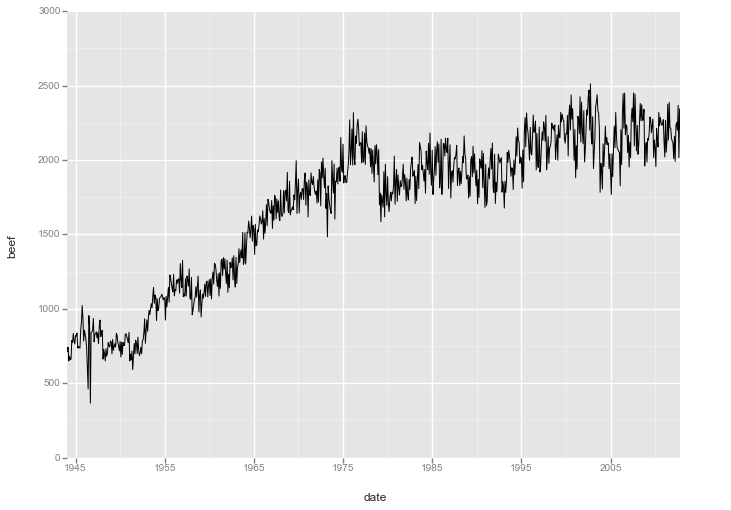

<ggplot: (-9223372036492964236)>

In [135]:
# This is the example on ggplot's front page
from ggplot import ggplot, aes, meat, geom_line, stat_smooth

ggplot(aes(x='date', y='beef'), data=meat) + geom_line() #+ stat_smooth(colour='blue', span=0.2)

## Plotting in seaborn
* Seaborn is a high-level plotting library based on matplotlib
    * seaborn : matplotlib :: ggplot2 :  base R
* Designed to produce attractive figures in very little code
* _Great_ [documentation](https://stanford.edu/~mwaskom/software/seaborn/index.html)
* Most seaborn plotting functions accept pandas DataFrames
* Complete customization of seaborn plots is possible using matplotlib

### Heatmaps

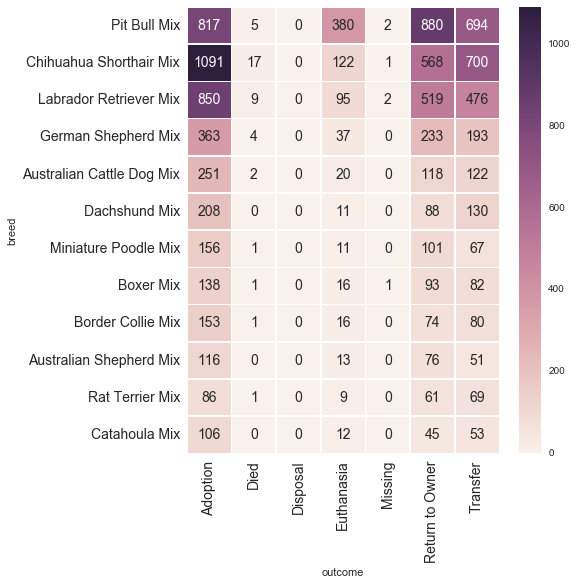

In [136]:
# The same contingency table from earlier
ax = sns.heatmap(ctab[:12], annot=True, fmt='d', linewidths=.5,
                 annot_kws={'size': 14})

# Customize the label size and figure size in base matplotlib.
# Notice we can access all axis and figure properties through
# # the handle we saved when calling seaborn.
ax.tick_params(labelsize=14)
ax.figure.set_size_inches((7, 8))  # update the plot size

Let's visualize the correlation between all numeric variables in the dataset

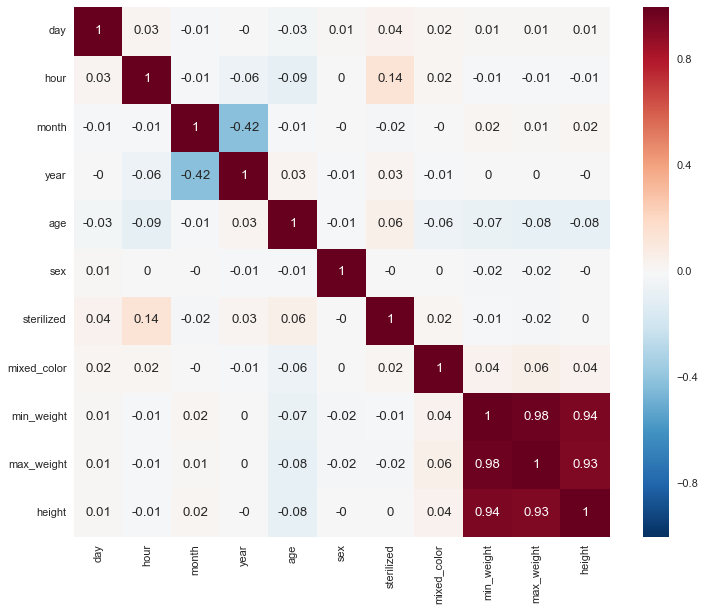

In [137]:
# Plot a heatmap of pairwise correlations between all continuous variables
r = data.query('animal=="Dog"').corr().round(2)
with sns.plotting_context("notebook", font_scale=1.1):
    ax = sns.heatmap(r, annot=True)
    ax.figure.set_size_inches((12, 9.5))

* Why do month and year show a strong negative correlation (-0.42)?
* Illustrates the need for caution
    * Most "interesting" findings turn out to have banal explanations!

### Pair plots
* Systematic inspection of pairwise relationships is very useful
* We've established that some breeds have very different outcomes
* How do outcomes relate to one another at the breed level?
    * Do some outcomes trade off against others?

/Users/tal/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
/Users/tal/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


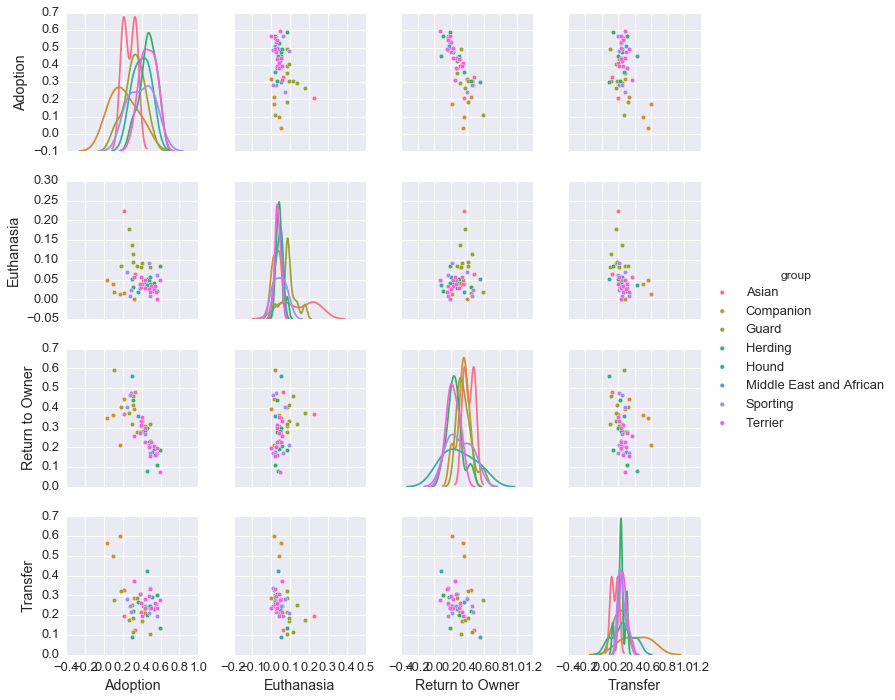

In [138]:
# Breed-level correlations between different outcomes and traits

# Restrict to breed with minimum 50 dogs and outcomes with min. 200 occurrences
_data = data.query('animal=="Dog"')
_data = _data.groupby('outcome').filter(lambda x: len(x) >= 200)
_data = _data.groupby('breed').filter(lambda x: len(x) >= 50)

# Dummy-code the outcomes as binary indicators and concatenate with original data
outcomes = pd.get_dummies(_data['outcome'])
_data = pd.concat([_data, outcomes], axis=1)

# Group by breed and calculate means
_data = _data.groupby(['group', 'breed']).mean().dropna().reset_index()
_data = _data[['Adoption', 'Euthanasia', 'Return to Owner', 'Transfer', 'group']]
dog_breed_means = _data  # Save for later

# # The actual plotting code is just this
# with sns.plotting_context("notebook", font_scale=1.3):  # Make text bigger
#     sns.pairplot(_data, diag_kind='kde', kind='reg')
    
# Another way to look at the same data...
with sns.plotting_context("notebook", font_scale=1.3):  # Make text bigger
    ax = sns.pairplot(_data, diag_kind='kde', hue='group')

* Let's explore how outcomes differ as a function of the variables in our dataset
* We'll start by visualizing the raw counts for different animals

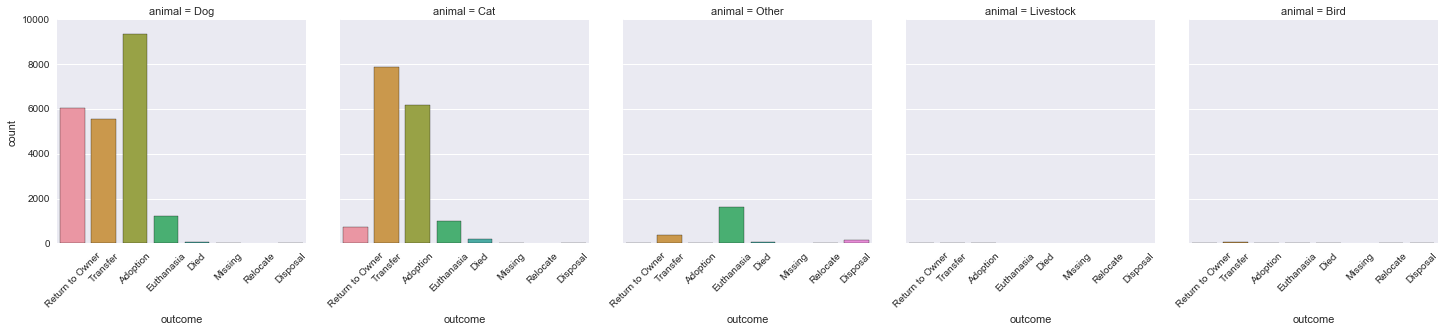

In [139]:
# Probably no point in keeping livestock and birds!
x_var = 'outcome'
panel_var = 'animal'
g = sns.factorplot(x=x_var, data=data, col=panel_var, kind='count')
g.set_xticklabels(rotation=45)

This is useful! Let's abstract it into a method. Then we can do the same thing (even more) quickly for other combinations.

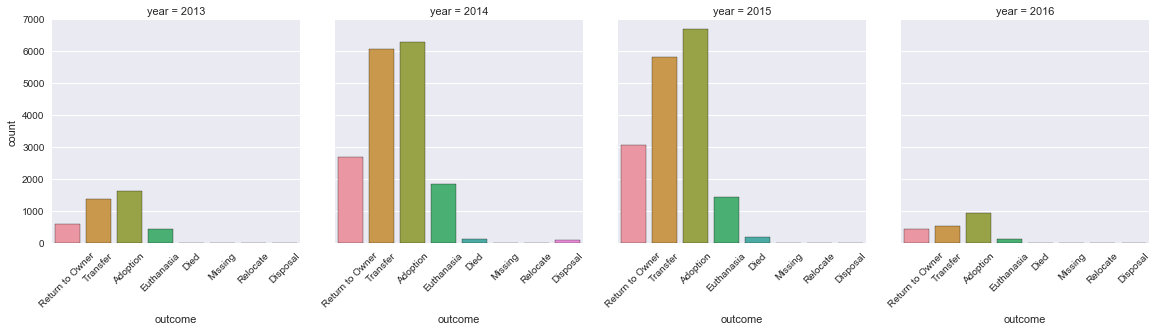

In [140]:
def aac_factorplot(data, x, facet, y=None, kind='count'):
    g = sns.factorplot(x=x, data=data, y=y, col=facet, kind=kind)
    g.set_xticklabels(rotation=45)
    
aac_factorplot(data, 'outcome', 'year')

#### Do temporal variables matter?
* We might expect day of the week to matter

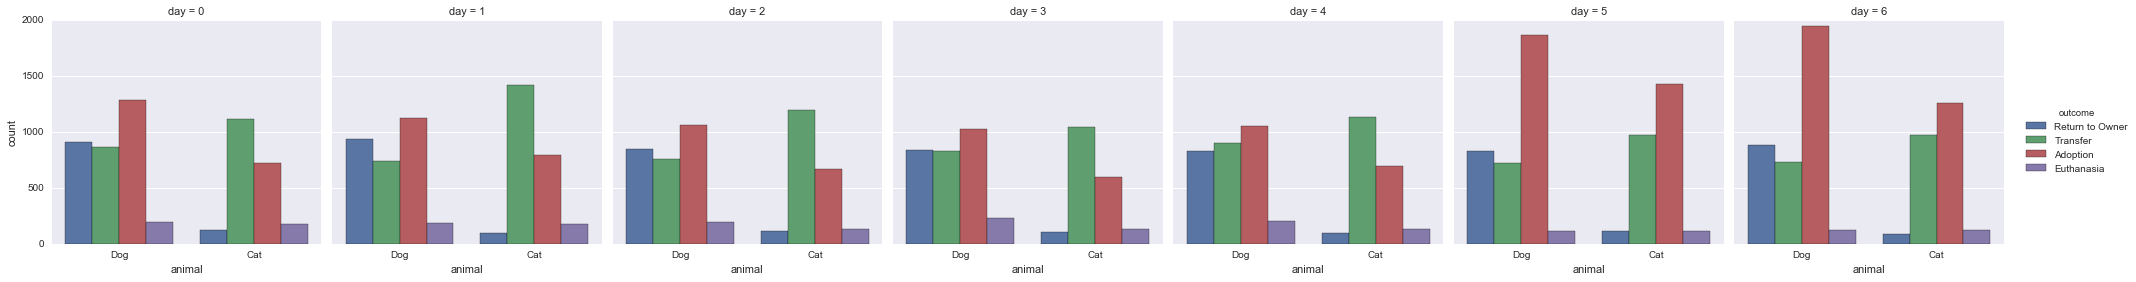

In [141]:
_data = data[data['animal'].isin(['Dog', 'Cat'])]
_data = _data.groupby('outcome').filter(lambda x: len(x) >= 500)
sns.factorplot(x='animal', data=_data, hue='outcome', col='day', kind='count') 

#### What about age?

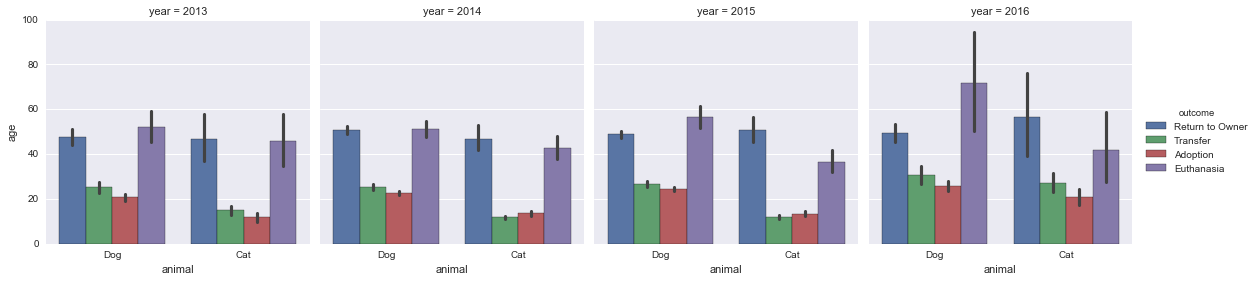

In [149]:
_data = data[data['animal'].isin(['Dog', 'Cat'])]
_data = _data.groupby('outcome').filter(lambda x: len(x) >= 500)
sns.factorplot(x='animal', y='age', data=_data, hue='outcome', col='year', kind='bar')

#### Color?

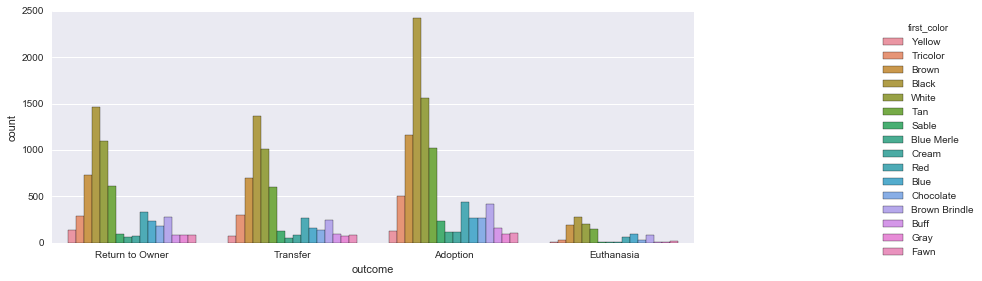

In [150]:
# Ideally, the colors should match the labels!
_data = data[data['animal'].isin(['Dog'])]
_data = _data.groupby('first_color').filter(lambda x: len(x) >= 200)
_data = _data.groupby('outcome').filter(lambda x: len(x) >= 500)
sns.factorplot(x='outcome', data=_data, hue='first_color', kind='count')
plt.gcf().set_size_inches((15, 4))

# Statistical analysis
* Python is historically not widely used for traditional statistics
    * It's improving fast, but will probably never catch up to R
* But it has decent support for the most common models
* Shines in:
    * Machine learning
    * Specific science domains--e.g., astrophysics, ecology, neuroimaging
    * More computationally-oriented domains--e.g., deep learning, Bayesian analysis

## Statistics functions in SciPy
* The SciPy package includes a well-developed [stats module](http://docs.scipy.org/doc/scipy/reference/stats.html)
* Caters more to computational scientists than end users
    * Interface is heavily object-oriented
    * You usually have to take the extra step yourself
    * Performance is very good, but interface is clunky

### Lots of descriptives and convenience functions

In [151]:
# Descriptive statistics for age in months
print(stats.describe(data['age'].dropna()))

# Plenty of little convenience functions
age = 60 
percentile = stats.percentileofscore(data['age'], age)
print("\nA {}-month old animal is at the {:.0f}th percentile.".format(age, percentile))

DescribeResult(nobs=40578, minmax=(0.0, 264.0), mean=25.262913401350485, variance=1200.0373421735881, skewness=2.261715711882563, kurtosis=5.46493628223034)

A 60-month old animal is at the 87th percentile.


### Distributions a-plenty
* Huge number of statistical [distributions](http://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions)
* All of the standard distribution functions (pdf, cdf, random sampling, etc.) 

/Users/tal/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


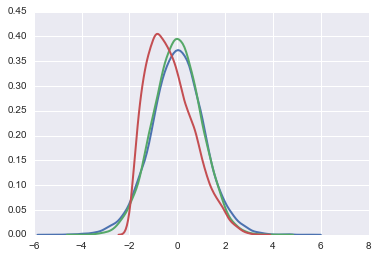

In [180]:
# Sample 1000 observations from a bunch of distributions and plot
n = 10000

normal = stats.norm.rvs(size=n)
t = stats.t.rvs(df=10, size=n)
beta = stats.beta.rvs(a=2, b=5, loc=-2, scale=6, size=n)

ax = plt.figure(figsize=(6, 4)).gca()

for dist in [t, normal, beta]:
    sns.kdeplot(dist, ax=ax, lw=2)

In [153]:
# Use CDF of normal to convert p-values to z-scores
print(stats.norm.ppf(0.001))

# t statistic to p-value
print(stats.t.cdf(1.46, df=22))

# Endpoints of interval containing 90% of distribution
print(stats.beta.interval(0.9, a=2, b=5))

-3.09023230617
0.920788098528
(0.062849891708354366, 0.58180340925202589)


### Basic tests
* You can do things like t-tests and ANOVAs with SciPy if you really want
* But there are more pleasant ways

In [154]:
# Independent samples t-test: do cats and dogs processed at the center differ in age?

# Extract 
dog_age = data.query('animal=="Dog"')['age'].dropna()
cat_age = data.query('animal=="Cat"')['age'].dropna()

# ttest_ind returns a tuple of t and p values
t, p = stats.ttest_ind(dog_age, cat_age)

# Report means as well
dm, cm = dog_age.mean(), cat_age.mean()

# Print something for the user
print("Dogs (mean = {:.2f}) vs. Cats (mean = {:.2f}), t = {:.2f}, p={:.2g}".format(dm, cm, t, p))

Dogs (mean = 32.87) vs. Cats (mean = 16.36), t = 46.12, p=0


## [Statsmodels](http://statsmodels.sourceforge.net/devel/index.html#)
* Python's answer to base R
* It's not a very good answer
* But it's getting there, and things [move quickly](https://github.com/statsmodels/statsmodels/issues)
* For common procedures, functionality is very similar to R

### What's in statsmodels
* Basic tests
* Linear models
* Diagnostics and specification tests
* Power calculations
* Multiple comparisons correction
* Time-series analysis
* Experimental support for many other things (e.g. mixed-effects models)

### Statsmodel examples
* Let's build a model to predict whether an animal is euthanized or not
* We'll use logistic regression with the native statsmodels API
* We'll start by predicting euthanasia from just age, sex, and sterilization

In [155]:
# Drop missing values from analysis
_data = data[['outcome', 'age', 'sex', 'sterilized', 'mixed_color']].dropna()
print("Kept {} observations.".format(len(_data)))

# Add intercept manually for logistic model
_data['intercept'] = 1
_data['age_x_mixed_color'] = _data['age'] * _data['mixed_color']

# The dependent variable: whether the animal was euthanized
y = (_data['outcome'] == 'Euthanasia').astype(int)
_data.pop('outcome')

# Regression on continuous predictors is simple
model = sm.Logit(y, _data)

# Fit model and save result
result = model.fit()

# Print a user-friendly summary
result.summary()

Kept 36965 observations.
Optimization terminated successfully.
         Current function value: 0.193226
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                outcome   No. Observations:                36965
Model:                          Logit   Df Residuals:                    36959
Method:                           MLE   Df Model:                            5
Date:                Fri, 27 May 2016   Pseudo R-squ.:                  0.1344
Time:                        00:12:41   Log-Likelihood:                -7142.6
converged:                       True   LL-Null:                       -8252.0
                                        LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
age                   0.0173      0.001     26.012      0.000         0.016     0.019
sex                  -0.2856      0.047     -6.086      0.000        -0.378    -0.194
sterilized           -1.8948      0.050    -38.125      0.000        -1.992    -1.797
mixed_color           0.2389      0.060      3.953      0.000         0.120     0.357
intercept            -2.2632      0.050    -45.074      0.000        -2.362    -2.165
age_x_mixed_color    -0.0021      0.001     -2.258      0.024        -0.004    -0.000
=====================================================================================
"""

### Adding categorical predictors
* Old animals are more likely to be euthanized
* Is this explained by differences in species, breed, etc.?
* We can add categorical predictors either by:
    * Constructing the dummy variables ourselves (e.g., with pandas)
    * Using the patsy module to do it in an R-like way

In [156]:
# There are nearly 1,800 unique values for breed in our data.
# We can't get reasonable estimate for most of those; there
# are too few observations. Let's restrict analysis to
# common dog breeds--100 or more individuals.
_data = data.query('animal=="Dog"')
_data = _data.groupby('breed').filter(lambda x: len(x) >= 100)

# The NaNs in some columns might cause problems; let's replace them
cols = ['sex', 'sterilized']
_data[cols] = _data[cols].fillna('Unknown')

# Explicitly add the dependent variable
_data['y'] = (_data['outcome'] == 'Euthanasia').astype(int)

# We can easily set up the design matrix with an R-style formula
from patsy import dmatrices
y, X = dmatrices('y ~ age + breed + C(sex) + C(sterilized)',
                 data=_data, return_type='dataframe')

results = sm.Logit(y, X).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.199806
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                13964
Model:                          Logit   Df Residuals:                    13926
Method:                           MLE   Df Model:                           37
Date:                Fri, 27 May 2016   Pseudo R-squ.:                  0.1662
Time:                        00:12:41   Log-Likelihood:                -2790.1
converged:                       True   LL-Null:                       -3346.0
                                        LLR p-value:                2.708e-209
===============================================================================================================
                                                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------------------
Intercept                                      -1.6868      0.307     -5.486      0.000        -2.289    -1.084
breed[T.American Staffordshire Terrier Mix]     0.1447      0.441      0.328      0.743        -0.719     1.009
breed[T.Australian Cattle Dog Mix]             -0.8219      0.384     -2.139      0.032        -1.575    -0.069
breed[T.Australian Kelpie Mix]                 -1.2791      0.662     -1.931      0.053        -2.577     0.019
breed[T.Australian Shepherd Mix]               -0.6619      0.424     -1.561      0.119        -1.493     0.169
breed[T.Beagle Mix]                            -1.9248      0.665     -2.896      0.004        -3.227    -0.622
breed[T.Border Collie Mix]                     -0.6381      0.406     -1.572      0.116        -1.434     0.158
breed[T.Boxer Mix]                             -0.8232      0.404     -2.036      0.042        -1.616    -0.031
breed[T.Cairn Terrier Mix]                     -1.0562      0.595     -1.774      0.076        -2.223     0.111
breed[T.Catahoula Mix]                         -0.4055      0.433     -0.938      0.348        -1.253     0.442
breed[T.Chihuahua Longhair Mix]                -1.1916      0.525     -2.270      0.023        -2.220    -0.163
breed[T.Chihuahua Shorthair]                   -1.6979      0.620     -2.738      0.006        -2.913    -0.482
breed[T.Chihuahua Shorthair Mix]               -0.8792      0.319     -2.752      0.006        -1.505    -0.253
breed[T.Chihuahua Shorthair/Dachshund]         -1.3529      0.663     -2.040      0.041        -2.652    -0.053
breed[T.Dachshund Mix]                         -1.3722      0.438     -3.135      0.002        -2.230    -0.514
breed[T.Dachshund/Chihuahua Shorthair]         -0.3472      0.562     -0.618      0.537        -1.448     0.754
breed[T.German Shepherd Mix]                   -0.8164      0.351     -2.325      0.020        -1.504    -0.128
breed[T.Great Pyrenees Mix]                    -1.2295      0.597     -2.059      0.039        -2.400    -0.059
breed[T.Jack Russell Terrier Mix]              -1.2574      0.525     -2.395      0.017        -2.286    -0.228
breed[T.Labrador Retriever]                    -2.7393      1.058     -2.590      0.010        -4.813    -0.666
breed[T.Labrador Retriever Mix]                -0.6886      0.323     -2.132      0.033        -1.322    -0.055
breed[T.Labrador Retriever/Pit Bull]            0.2691      0.463      0.581      0.561        -0.639     1.177
breed[T.Miniature Poodle Mix]                  -1.2966      0.443     -2.925      0.003        -2.166    -0.428
breed[T.Miniature Schnauzer Mix]               -1.2027      0.486     -2.474      0.013        -2.155    -0.250
breed[T.Pit Bull]                               0.5359      0.413      1.297      0.195        -0.274     1.346
breed[T.Pit Bull Mix]                           0.4521      0.309      1.464      0.143        -0.153    

In [157]:
# The coefficients are in logit space; we can convert them to odds ratios
np.exp(results.params).sort_values()

breed[T.Labrador Retriever]                    0.064614
breed[T.Pointer Mix]                           0.119625
breed[T.Beagle Mix]                            0.145902
breed[T.Chihuahua Shorthair]                   0.183067
C(sterilized)[T.1.0]                           0.184070
Intercept                                      0.185118
breed[T.Shih Tzu Mix]                          0.207438
breed[T.Dachshund Mix]                         0.253539
breed[T.Chihuahua Shorthair/Dachshund]         0.258496
breed[T.Miniature Poodle Mix]                  0.273450
breed[T.Australian Kelpie Mix]                 0.278293
breed[T.Jack Russell Terrier Mix]              0.284401
breed[T.Rat Terrier Mix]                       0.285840
breed[T.Great Pyrenees Mix]                    0.292432
breed[T.Miniature Schnauzer Mix]               0.300385
breed[T.Chihuahua Longhair Mix]                0.303738
breed[T.Cairn Terrier Mix]                     0.347784
breed[T.Yorkshire Terrier Mix]                 0

# [Probabilistic programming](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers)
* An up-and-coming paradigm for flexible statistical modeling
* Allows one to express virtually any type of model in code
* Doesn't require analytical derivation in order to fit the model
* Uses MCMC sampling to approximate the asymptotic answer
* Very powerful, but computationally intensive
* The state of the art is advancing rapidly
* Strong support in Python: [PyStan](https://pystan.readthedocs.io/en/latest/), [PyMC3](https://github.com/pymc-devs/pymc3), emcee, etc.

In [ ]:
# Installing pymc3 can take a little more work than other packages.
# Try running this cell, but don't freak out of it doesn't work.
!pip install Theano
!pip install git+https://github.com/pymc-devs/pymc3

In [159]:
import pymc3 as pm

# Read in the data; keep only columns we need
_data = data[['outcome', 'age', 'animal', 'sex', 'sterilized', 'breed']]

# Drop NAs, filter on breed and animal
_data = _data.dropna()
_data = _data.groupby('animal').filter(lambda x: len(x) >= 500).reset_index()
_data = _data.groupby('breed').filter(lambda x: len(x) >= 100).reset_index()

## Writing a PyMC3 model
* PyMC3 is a probabilistic programming framework that lets you write models in pure Python
* Built on the [Theano](http://deeplearning.net/software/theano/) numerical computing library
* Implements many cutting-edge methods (the NUTS sampler, ADVI, etc.)

In [160]:
from sklearn.preprocessing import LabelEncoder

def invlogit(x):
    ''' Inverse logit '''
    return pm.exp(x) / (1 + pm.exp(x))

# Initialize PyMC3 model
model = pm.Model()

# Set dependent variable--whether or not animal is adopted
y = (_data['outcome']=='Adoption').astype(int).values

with model:
    
    # Initialize the predicted values to 0
    mu = 0.
    
    # Add fixed effects of sex, sterilization, and age
    b1 = pm.Normal('b_sex' ,mu=0, sd=10)
    b2 = pm.Normal('b_sterilized' ,mu=0, sd=10)
    b3 = pm.Normal('b_age' ,mu=0, sd=10)
    
    mu += b1*_data['sex'].values + b2*_data['sterilized'].values + b3*_data['age'].values
    
    # Add species intercepts
    b4 = pm.Normal('b_species', mu=0, sd=10, shape=2)
    animal_inds = LabelEncoder().fit_transform(_data['animal'].values)
    mu += b4[animal_inds]
    
    n_levels = _data['breed'].nunique()
    _sigma = pm.Uniform('sigma_breed', 0, 10)
    beta = pm.Normal('u_breed', mu=0, sd=_sigma, shape=n_levels)
    inds = LabelEncoder().fit_transform(_data['breed'].values)
    mu += beta[inds]

# #     # Should really be modeled as a logistic regression, but for the
# #     # sake of speed and interpretable coefficients, we use the normal
    sigma = pm.HalfCauchy('sigma', 5)
    y_obs = pm.Normal('y_obs', mu=mu, sd=sigma, observed=y)

#     # uncomment to use logistic model
#     p = invlogit(mu)
#     y_obs = pm.Bernoulli('y_obs', p=p, observed=y)

Applied interval-transform to sigma_breed and added transformed sigma_breed_interval to model.
Applied log-transform to sigma and added transformed sigma_log to model.


### Sample!

In [161]:
with model:
    trace_with_breed = pm.sample(2000, step=pm.NUTS(), start=pm.find_MAP(), progressbar=True)

 [-----------------100%-----------------] 2000 of 2000 complete in 53.7 sec

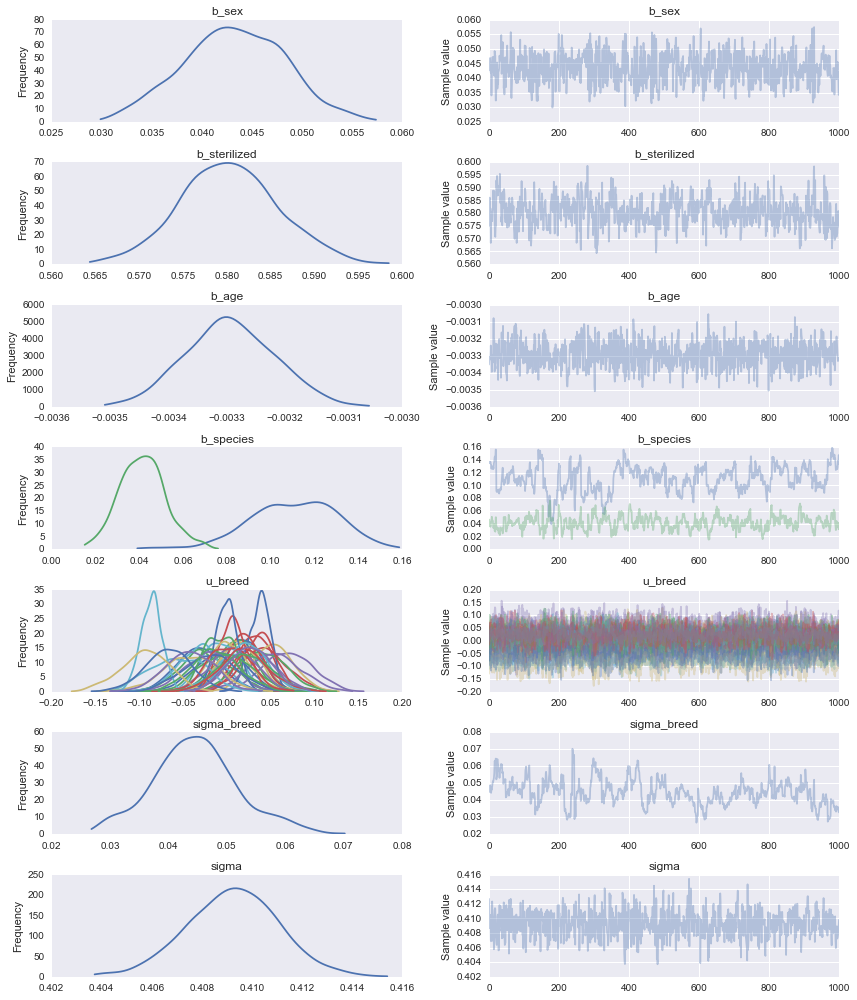

In [162]:
p = pm.traceplot(trace_with_breed[1000:])

In [163]:
pm.summary(trace[2000:])


b_sex:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.044            0.005            0.000            [0.034, 0.053]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.035          0.041          0.044          0.047          0.053


b_sterilized:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.584            0.005            0.000            [0.574, 0.595]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.573          0.581          0.584          0.588          0.595


b_age:

  Mean             SD               MC Error         95% HPD interval
  ------------------